# Imports

In [3]:
!pip install nltk
!pip install unidecode
!pip install WordCloud

     |████████████████████████████████| 368kB 7.4MB/s eta 0:00:01


In [4]:
%matplotlib inline


import matplotlib.pyplot as plt
import pandas as pd
import nltk
import unidecode
import pickle

from string import punctuation
from wordcloud import WordCloud
from nltk import tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     /home/dsxuser/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to
[nltk_data]    |     /home/ds

True

#Loading Data

In [6]:
# The code was removed by Watson Studio for sharing.

# Exploratory Analysis

In [7]:
df_reviews.shape

(100000, 7)

In [8]:
df_reviews.head(10)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,NaN,NaN,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,NaN,NaN,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47


In [9]:
df_reviews.review_score.value_counts()

5    57420
4    19200
1    11858
3     8287
2     3235
Name: review_score, dtype: int64

In [10]:
df_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [11]:
df_reviews.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

#Text Processing

In [12]:
stop_words = nltk.corpus.stopwords.words('portuguese')
token_space =  tokenize.WhitespaceTokenizer()
token_punctuation = tokenize.WordPunctTokenizer()
stemmer = nltk.RSLPStemmer()

list_punctuation = list()
for punct in punctuation:
    list_punctuation.append(punct)

punct_stopwords = list_punctuation + stop_words

stopwords_whiout_accent = [unidecode.unidecode(x) for x in punct_stopwords]

In [13]:
def separete_sentences_whitespace(data):
    '''Function responsible for separating phrases by whitespace'''
    processed_phrase = list()
    for op in data:
        new_phrase = list()
        word_text = token_space.tokenize(op)
        for word in word_text:
          if word not in stop_words:
            new_phrase.append(word)
        processed_phrase.append(' '.join(new_phrase))
    return processed_phrase

In [14]:
def remove_ponctuation(data):
    '''Function responsible for remove all ponctuation'''
    processed_phrase = list()
    for op in data:
        new_phrase = list()
        text_word = token_punctuation.tokenize(op)
        for word in text_word:
            if word not in punct_stopwords:
                new_phrase.append(word)
        processed_phrase.append(' '.join(new_phrase))
    return processed_phrase

In [15]:
def remove_accent(data):
    '''Function responsible for remove all accent'''
    whiout_accent = [unidecode.unidecode(x) for x in data]
    stopwords_whiout_accent = [unidecode.unidecode(x) for x in punct_stopwords]
    data = whiout_accent
    processed_phrase = list()
    for op in data:
      new_phrase = list()
      text_word = token_punctuation.tokenize(op)
      for word in text_word:
          if word not in stopwords_whiout_accent:
              new_phrase.append(word)
      processed_phrase.append(' '.join(new_phrase))
    return processed_phrase

In [16]:
def transform_text_lower(data):
    '''Function responsible for transform all text in lower case'''
    processed_phrase = list()
    stopwords_whiout_accent = [unidecode.unidecode(x) for x in punct_stopwords]
    for op in data:
        new_phrase = list()
        op = op.lower()
        text_word = token_punctuation.tokenize(op)
        for word in text_word:
            if word not in stopwords_whiout_accent:
                new_phrase.append(word)
        processed_phrase.append(' '.join(new_phrase))
    return processed_phrase

In [17]:
def set_stemmer(data):
    '''Function responsible for aplicate stemmer in text'''
    stopwords_whiout_accent = [unidecode.unidecode(x) for x in punct_stopwords]
    processed_phrase = list()
    for op in data:
        new_phrase = list()
        op = op.lower()
        text_word = token_punctuation.tokenize(op)
        for word in text_word:
            if word not in stopwords_whiout_accent:
                new_phrase.append(stemmer.stem(word))
        processed_phrase.append(' '.join(new_phrase))
    return processed_phrase

In [18]:
def execute_processing(data):
    '''Function responsible for aplicate all treatment'''
    functions =  ['separete_sentences_whitespace','remove_ponctuation','remove_accent','transform_text_lower','set_stemmer']
    for f in functions:
        data = eval(f)(data)
    return data

#Training

In [19]:
base_sentimento = pd.DataFrame([('odiei o produto','negativo'),
                  ('otimo produto atende as espectativas','positivo'),
                  ('entrega horrivel demais','negativo'),
                  ('demorou muito','negativo'),
                  ('ainda nao chegou','neutro'),
                  ('entrega muito rapida','positivo'),
                  ('produto igual anunciado','positivo'),
                  ('veio com defeito','negativo'),
                  ('produto falsificado falso','negativo'),
                  ('nada a declarar','neutro'),
                  ('prazo muito bom','positivo'),
                  ('que arrependimento de ter comprado','negativo'),
                  ('pura enganacao','negativo'),
                  ('odiei o produto','negativo'),
                  ('otimo produto atende as espectativas','positivo'),
                  ('entrega horrivel demais','negativo'),
                  ('demorou muito','negativo'),
                  ('ainda nao chegou','neutro'),
                  ('entrega muito rapida','positivo'),
                  ('produto igual anunciado','positivo'),
                  ('veio com defeito','negativo'),
                  ('empresa muito atenciosa e prestativa','positivo'),
                  ('otimo vendedor me atendeu bem','positivo'),('recomendo','positivo'),
                  ('obtive','positivo'),
                  ('era para','positivo'),
                  ('encaixa','positivo'),
                  ('reconhece','positivo'),
                  ('devo','positivo'),
                  ('e','positivo'),
                  ('eh','positivo'),
                  ('eram','positivo'),
                  ('estornaram','positivo'),
                  ('funciona','positivo'),
                  ('antes','positivo'),
                  ('prazo','positivo'),
                  ('eficiente','positivo'),
                  ('adorei','positivo'),
                  ('Parabens','positivo'),
                  ('confiavel','positivo'),
                  ('ok','positivo'),
                  ('recebi','positivo'),
                  ('tudo certo','positivo'),
                  ('certo','positivo'),
                  ('excelente','positivo'),
                  ('otimo','positivo'),
                  ('custo beneficio','positivo'),
                  ('nota 10','positivo'),
                  ('muito bonito','positivo'),
                  ('tranquilo','positivo'),
                  ('seguro','positivo'),
                  ('otima loja','positivo'),('dificilmente','negativo'),
                  ('nao','negativo'),
                  ('nao consegue','negativo'),
                  ('nao conseguem','negativo'),
                  ('nao conseguiam','negativo'),
                  ('nao conseguirei','negativo'),
                  ('nao conseguiriam','negativo'),
                  ('nao consigo','negativo'),
                  ('nao devem','negativo'),
                  ('nao deverao','negativo'),
                  ('nao deveriam','negativo'),
                  ('nao recomendo','negativo'),
                  ('nao obtive','negativo'),
                  ('era para','negativo'),
                  ('nao encaixa','negativo'),
                  ('nao reconhece','negativo'),
                  ('nao devo','negativo'),
                  ('nao e','negativo'),
                  ('nao eh','negativo'),
                  ('nao eram','negativo'),
                  ('nao estao','negativo'),
                  ('nao estarao','negativo'),
                  ('nao estariam','negativo'),
                  ('nao estavam','negativo'),
                  ('nao estiveram','negativo'),
                  ('nao farao','negativo'),
                  ('nao farei','negativo'),
                  ('nao faz','negativo'),
                  ('nao faziam','negativo'),
                  ('nao fez','negativo'),
                  ('nao fiz','negativo'),
                  ('nao ousa','negativo'),
                  ('nao ousam','negativo'),
                  ('nao ousarao','negativo'),
                  ('nao ousariam','negativo'),
                  ('nao ouso','negativo'),
                  ('nao poderei','negativo'),
                  ('nao poderia','negativo'),
                  ('nao podia','negativo'),
                  ('nao posso','negativo'),
                  ('nao sao','negativo'),
                  ('nao serao','negativo'),
                  ('nao serei','negativo'),
                  ('nao seriam','negativo'),
                  ('nao sou','negativo'),
                  ('nao tem','negativo'),
                  ('nao tenho','negativo'),
                  ('nao terei','negativo'),
                  ('nao teria','negativo'),
                  ('nao tinha','negativo'),
                  ('nao fecha','negativo'),
                  ('nao estornaram','negativo'),
                  ('nao funciona','negativo'),
                  ('nao gostei','negativo'),
                  ('negacao','negativo'),
                  ('ope','negativo'),
                  ('raramente','negativo'),
                  ('problema','negativo'),
                  ('insatisfeita','negativo'),
                  ('cancelei','negativo'),
                  ('mesmo assim','negativo'),
                  ('faltou','negativo')
                   ])
base_sentimento.columns = ['comment','feeling']

In [20]:
def train_model(data, column_text, column_target):
    vectorizer = TfidfVectorizer(lowercase = False, ngram_range = (1,2))
    tvet = vectorizer.fit_transform(data[column_text])
    x_train, x_test, y_train, y_test = train_test_split(tvet,
                                                        data[column_target],
                                                        random_state=42)
    clf = LogisticRegression(solver = 'lbfgs')
    clf.fit(x_train, y_train)
    pickle._dump(clf, open('train_data.pkl', 'wb'))
    pickle._dump(vectorizer, open('train_vect.pkl', 'wb'))

In [21]:
def predict_model(text):
    loaded_model = pickle.load(open('train_data.pkl', 'rb'))
    loaded_vectorize = pickle.load(open('train_vect.pkl', 'rb'))
    data = execute_processing([text])
    tvet = loaded_vectorize.transform(data)
    return loaded_model.predict(tvet)

In [22]:
base_sentimento['text'] = execute_processing(base_sentimento['comment'])

In [23]:
train_model(base_sentimento,'text', 'feeling')

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [24]:
comments = df_reviews[df_reviews['review_comment_message'].isna() == False]['review_comment_message']
title = df_reviews[df_reviews['review_comment_title'].isna() == False]['review_comment_title']

In [28]:
comments.head()

3                 Recebi bem antes do prazo estipulado.
4     Parabéns lojas lannister adorei comprar pela I...
9     aparelho eficiente. no site a marca do aparelh...
12      Mas um pouco ,travando...pelo valor ta Boa.\r\n
15    Vendedor confiável, produto ok e entrega antes...
Name: review_comment_message, dtype: object

#Data Visualization

In [29]:
def word_cloud_pos(data):
    word_cloud = WordCloud(width = 800, height = 500, max_font_size = 110, collocations= False
                          ).generate(' '.join([text for text in data]))

    plt.figure(figsize=(10,7))
    plt.imshow(word_cloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show()

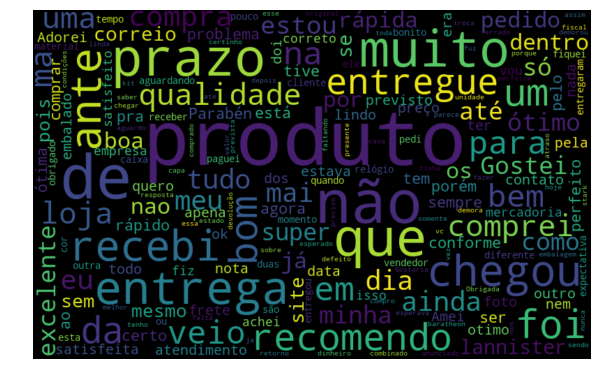

In [30]:
word_cloud_pos(comments)